 # Assignment 2

In [89]:
library(dplyr)
library(ggplot2)
library(tidyverse)


## Exercise 1 - Discrete random variable

##### 1.1- write the R probability functions for the probability density and cumulative distribution functions,following the R naming convention

In [95]:
dunif.2 <- function(k) { 
    prob <- ifelse( k>0 & k<6, k/15, 0)    #pdf
    return (prob)
     }

punif.2 <- function(k){

    prob <- ifelse(k>0 & k<6 ,(k**2)/30,0)   #cdf
    return (prob)
    }



##### 1.2- produce two plots showing the pdf and cdf, separately

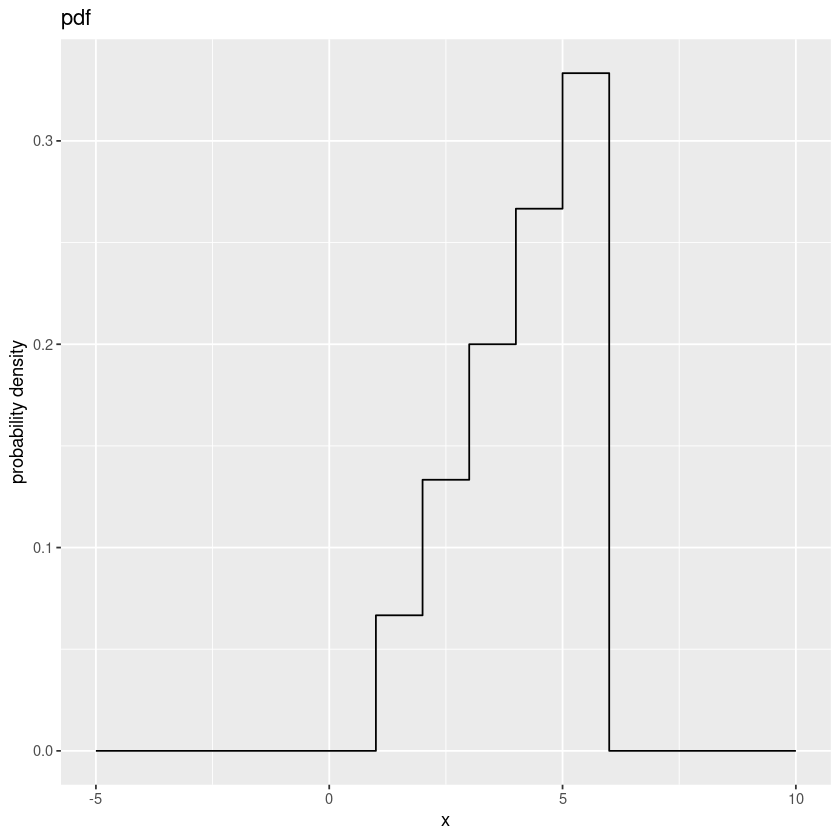

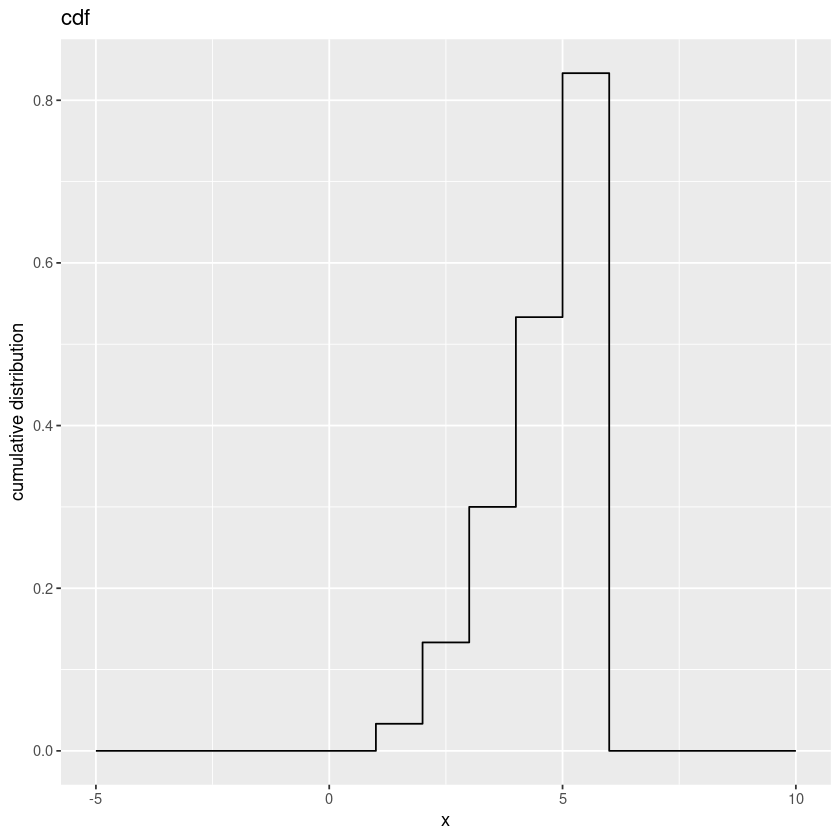

In [96]:
#produce two plots showing the pdf and cdf, separately
k <- -5:10

data <- data.frame(x=k ,y=dunif.2(k) , z=punif.2(k))
pdf_plot <- ggplot() + geom_step(data=data,aes(x=k, y= y)) + labs(x='x', y='probability density') +ggtitle("pdf")
cdf_plot <- ggplot() + geom_step(data=data,aes(x=k , y=z)) + labs(x='x', y='cumulative distribution') +ggtitle("cdf")

     
pdf_plot
cdf_plot

##### 1.3- compute, using R, the mean value and variance of the probability distribution

In [100]:
#mean
themean <- integrate(function(n){n*punif.2(n)}, lower=0, upper= 5)
themean <- themean$value # have to put $value to print it

#variance
V1 <- integrate(function(n) {(n**2)*punif.2(n)}, lower=0, upper=5)
V1 <- V1$value   
variance <- V1 - themean**2

cat('Distribution mean = ', themean, '\n')
cat('Distribution varince = ', variance)


Distribution mean =  5.208333 
Distribution varince =  -6.293403

In [101]:
#in this cell write mean and variance with R functions but the output is different :|
#k <- 1:5
#avg = mean(dunif.2(k))
#var = var(dunif.2(k))
#cat('Distribution mean = ', avg, '\n')
#cat('Distribution varince = ', var)
#dunif.2(k)

##### 1.4- compute, using R, the expected value E [k (6 − k)]

In [59]:
Ex <- integrate(function(k) {k*(6-k) * dunif.2(k)}, lower=0, upper = 5)
Ex <- Ex$value
cat('value of E[k(k-6)] is :', Ex)

value of E[k(k-6)] is : 6.25

##### 1.5- write the R function that allows to sample random numbers from the probability distribution

In [103]:
myrand <- function(k, N){
    
    down <- punif.2(k)- dunif.2(k)
    up <- punif.2(k)
    r = c()
    for (x in 1:N) {
        u <- runif(1)
        r <- append(r, k[u > down & u<=up])
    }
    return(r)
}
       

##### 1.6- using the implemented function (point (5)), sample $10^{5}$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

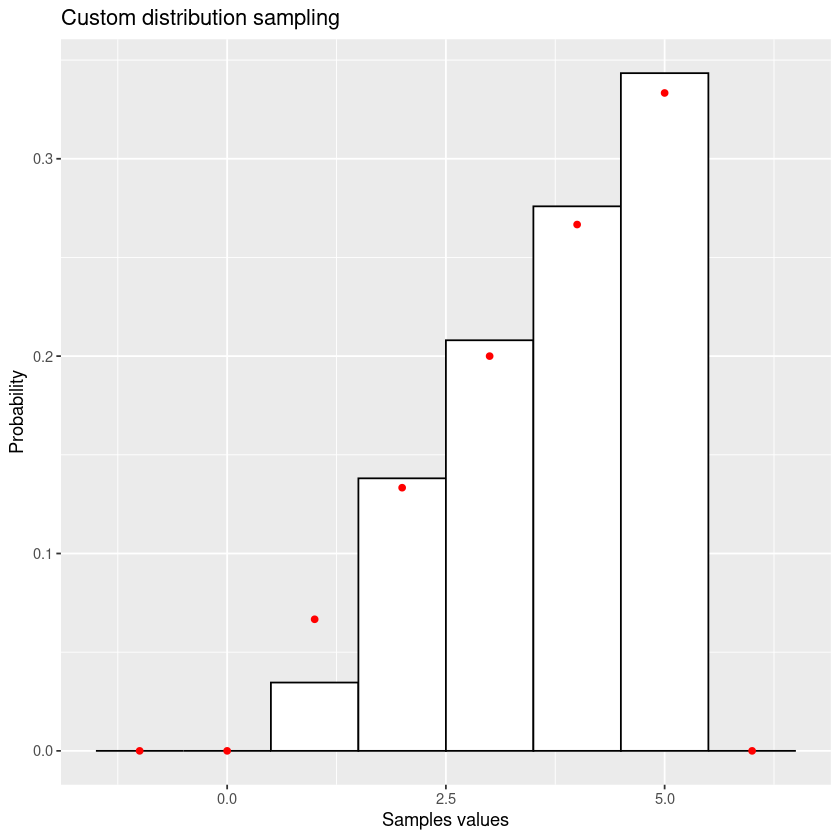

In [110]:

randdata <- data.frame(samples=myrand(k,10**5))


k <- -1:6   #want to see before and after the important term
data <- data.frame(x = k, y = dunif.2(k), z=punif.2(k))
     


ggplot() + 
    geom_histogram(data=randdata, aes(x=samples, y=after_stat(density)),color="black", fill="white", binwidth=1)+
    labs(title='Custom distribution sampling', x='Samples values', y='Probability')+
    geom_point(data=data, aes(x = k, y = y), color='red')
     


## Exercise 2 - Continuous random variable

#### a)

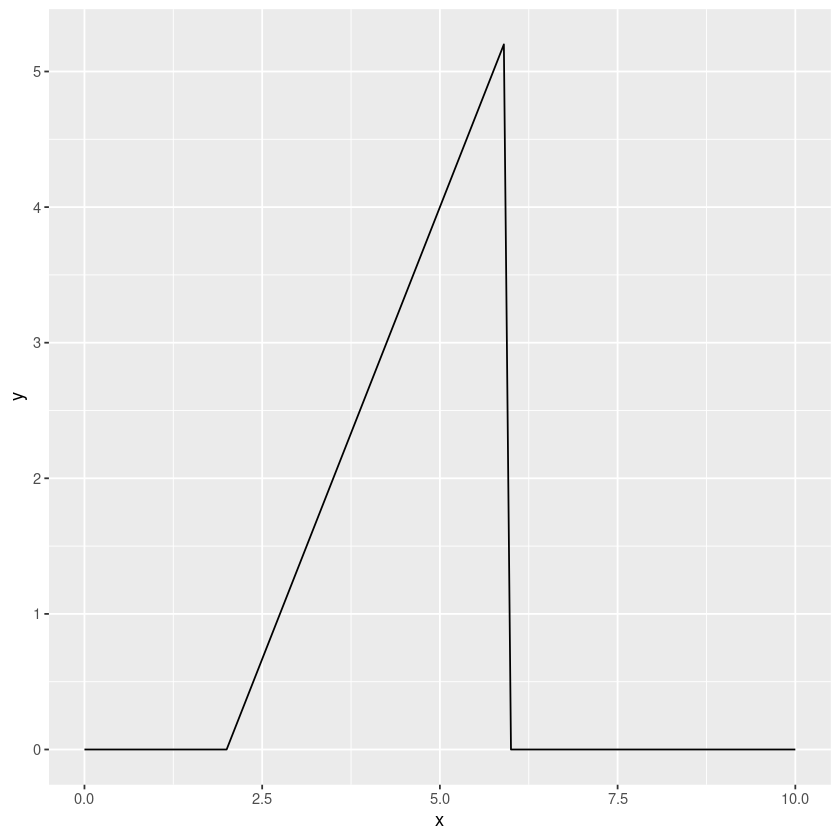

In [196]:
 f.2 <- function(x,a,b,c) {
   f<- ifelse ( x>= a & x<c, 
        ifelse ( x >=c & x <=b,2*(b-x)/(b-a)*(b-c), 2*(x-a)/(b-a)*(c-a))
        ,0)
   return(f)
 }

x <- seq(0, 10, by=0.1)
pf<- f.2(x=x, a=2, b=8, c=6)
cf <- f.2(x=x, a=2, b=8, c=6)
mydata <- data.frame(x=x, y=pf, z=cf)

ggplot( )+ geom_line(data=mydata, aes(x=x, y=y))

     


#### b)

In [197]:
genrand <- function(a,b,c,m,n) {
    k <- c()
    while(length(k) != n){
        num1 <- runif(1)
        num2 <- runif(1)
        num <- a+(b-a)*num1
        if(f.2(num,a,b,c) > m*num2){ 
            k<- append(k,num)
        }
    }
    return(k)
    
}



#### c)

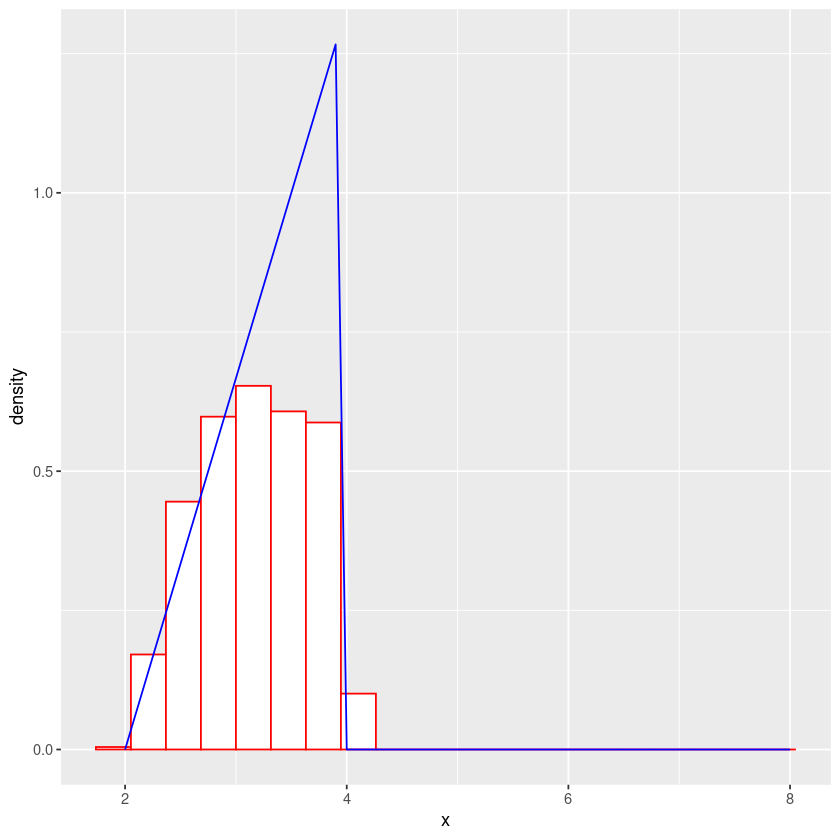

In [205]:
num <- genrand(2,8,4,0.5, 10000)
data_num <- data.frame(x=num)

x1 <- seq(2, 8, by=0.1)
pf<- f.2(x=x1, a=2, b=8, c=4)
data_num2 <- data.frame(x=x1, y=pf)


ggplot()+
    geom_histogram(data=data_num, aes(x=x, y=after_stat(density)), color="red", fill="white", bins=20)+
    geom_line(data=data_num2, aes(x=x, y=y), color="blue")

## Exercise 3

##### A)

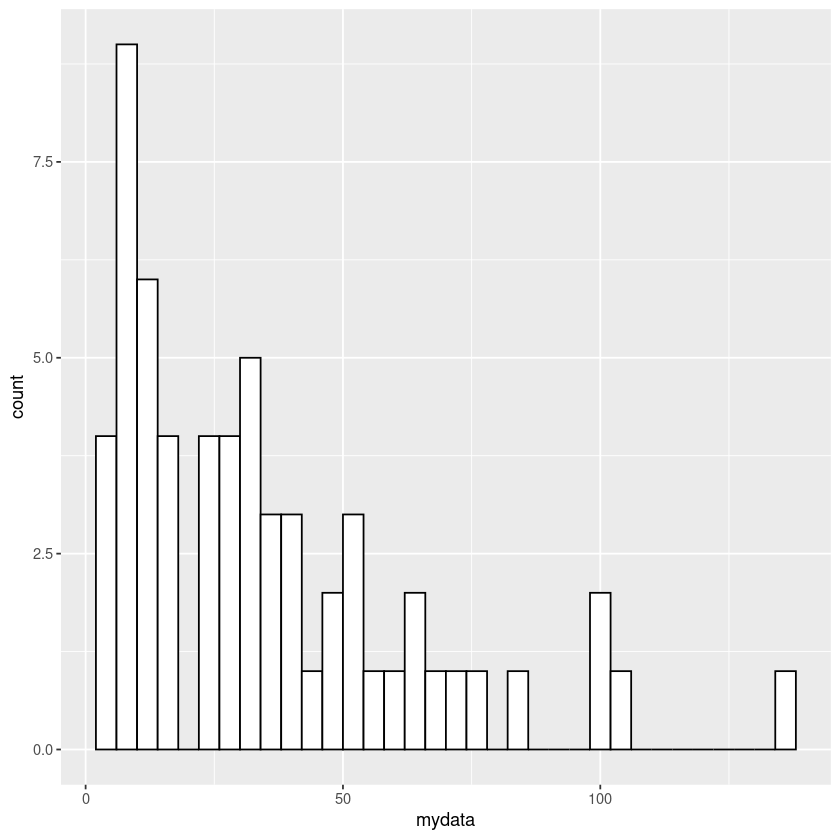

In [90]:
lambda=1/30 
x <- c(1:60)
df <- data.frame(mydata=rexp(60, rate=lambda))
ggplot()+ geom_histogram(data= df, aes(x=mydata),bins=, binwidth=4 , color="black", fill="white")



##### B)

In [91]:
less12 <- pexp(12, lambda)
cat("probability to waiting leass than 12min is:", less12)

probability to waiting leass than 12min is: 0.32968

##### C)

In [92]:
#expected value
expect <- integrate (function(x) {x*dexp(x,rate=lambda)}, lower=0, upper=Inf)

cat("the avarage waiting time is:", mean(rexp(60, rate=lambda)), "min", '\n')
cat("the expected value is :", expect$value , "min")

the avarage waiting time is: 28.45336 min 
the expected value is : 30 min

#### D)

In [94]:
onehoure <- 1 - pexp(60, rate=lambda)
cat("probability for waiting more than one houre is:", onehoure, "min")

probability for waiting more than one houre is: 0.1353353 min

## Exercise 4 - Multiple choices exams
P(k) = 0.7 : knowing the answer \
P(d) = 0.3 : do not know the answer 1-k \
P(c|d) = 1/5 : there is just one correct answer out of 5 question \
P(w|d) = 4/5 : the wrong answer \
P(c|k) = 1  :if the person know the answer will choose it \
P(w|k) = 0 : it's not possible that the person know the answer and choose the wrong one

answer this question with "Bayes Theorem":
$$ P(k|c)= \frac{P(c|k)P(k)}{P(c|k)P(k)+P(c|d)P(d)} $$

In [113]:
p_k <- 0.7
p_ck <- 1
p_cd <- 1/5

p_kc <- (p_ck*p_k) / (p_ck*p_k + p_cd*(1-p_k))
cat("probability that the student really knew the correct answer is :", p_kc)

probability that the student really knew the correct answer is : 0.9210526

## Exercise 5 - Waiting time

In [144]:
#the first way
lam1 <- 1/7.5  # the avarage time if arrive between two train time 
lam2 <- 1/15   # the avarage time if arrive before / after the train time
p <- 0.5 # probability is 50%


p10 <- pexp(10,rate=lam1)*p + pexp(10,rate=lam2)*p
cat("The probability of waiting at most 10 min is:",p10, '\n')

p15 <- 1-(pexp(15,rate=lam1)*p + pexp(15,rate=lam2)*p)
cat("The probability of waiting at least 15 min is:",p15)

#the second way in the following
#The out put of two ways are different because our measurement is in the very short time

The probability of waiting at most 10 min is: 0.6114929 
The probability of waiting at least 15 min is: 0.2516074

##### a) at most 10 minutes

In [138]:
#  second way:if want to wait at most 10min --> have to arrive at 10:50 or 11:25

P_1 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=5, upper=15)  # arrive between 10:50-11:00
P_2 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=35, upper=45) # arrive between 11:20-11:30
most10 <- signif((P_1$value + P_2$value)*100)
cat("The probability of waiting at most 10 min is:",most10, "%")



The probability of waiting at most 10 min is: 33.3333 %

##### b) at least 15 minutes

In [147]:
#  second way: waiting at least 15min --> arrive between 11:00-11:15 or 11:30-11:45

P_3 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=16, upper=30)  #arrive between 11:01-11:30
P_4 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=46, upper=60)  #arrive between 11:31-11:45
least15 <- signif((P_3$value+P_4$value)*100)

cat("The probability of waiting at least 15 min is:",least15, "%")


The probability of waiting at least 15 min is: 46.6667 %

##### c) what is the average time spent waiting ?

In [148]:
avgtime <- integrate(function(t){t*(dexp(t, rate=lam1)*p + dexp(t, rate=lam2)*p)}, 0, Inf)
cat('The average waiting time is: ', avgtime$value, 'min')

The average waiting time is:  11.25 min

## Exercise 6 - stock investment

In [4]:
n <- 200
p_price <- 85

themean <- n*p_price*0.1
thestd <- n*p_price*0.12

price800 <- pnorm(800, mean=themean, sd=thestd)
cat("probability that after a year his net profit is at least 800:", price800)

probability that after a year his net profit is at least 800: 0.3295426